In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Load images

In [68]:
# define path
nospill_path = Path(f'company/nospill')
oilspill_path = Path(f'company/oilspill')

In [69]:
# get nospill images
fn_nospills = []
nospills = []
for it in nospill_path.iterdir():
    if it.is_file():
        print(str(it.name))
        fn_nospills.append(it.name)
        nospills.append(cv2.imread(str(it)))
len(nospills)

145429.jpg
145440.jpg
145441.jpg
145442.jpg
145444.jpg
145447.jpg
145448.jpg
145449.jpg


8

In [70]:
# get oilspill images
oilspills = []
fn_oilspills = []
for it in oilspill_path.iterdir():
    if it.is_file():
        print(str(it))
        fn_oilspills.append(it.name)
        oilspills.append(cv2.imread(str(it)))
len(oilspills)

company\oilspill\145420.jpg
company\oilspill\145421.jpg
company\oilspill\145422.jpg
company\oilspill\145423.jpg
company\oilspill\145424.jpg
company\oilspill\145425.jpg
company\oilspill\145426.jpg
company\oilspill\145427.jpg
company\oilspill\145428.jpg
company\oilspill\145443.jpg
company\oilspill\145445.jpg
company\oilspill\145446.jpg
company\oilspill\560809.jpg
company\oilspill\560810.jpg
company\oilspill\560811.jpg
company\oilspill\560812.jpg
company\oilspill\560813.jpg
company\oilspill\560814.jpg
company\oilspill\560817.jpg
company\oilspill\560818.jpg
company\oilspill\560819.jpg
company\oilspill\S__3498019.jpg
company\oilspill\S__3498023.jpg
company\oilspill\S__3498026.jpg
company\oilspill\S__3498035.jpg
company\oilspill\S__3498036.jpg
company\oilspill\S__3498058.jpg
company\oilspill\S__3498062.jpg


28

Convert to grayscale

In [5]:
gray_nospills = []
for im in nospills:
    gray_nospills.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

In [6]:
gray_oilspills = []
for im in oilspills:
    gray_oilspills.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

In [7]:
# save files
gray_nospill_path = Path(f'gray/nospill')
gray_oilspill_path = Path(f'gray/oilspill')
gray_nospill_path.mkdir(parents=True, exist_ok=True)
gray_oilspill_path.mkdir(parents=True, exist_ok=True)
#
for fn, gray in zip(fn_nospills, gray_nospills):
    cv2.imwrite(str(gray_nospill_path / fn), gray)
for fn, gray in zip(fn_oilspills, gray_oilspills):
    cv2.imwrite(str(gray_oilspill_path / fn), gray)

 Image Segmentation using Thresholding

In [4]:
from skimage.filters import threshold_otsu

In [3]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

In [37]:
otsu_nospill_path = Path(f'otsu/nospill')
otsu_oilspill_path = Path(f'otsu/oilspill')
otsu_nospill_path.mkdir(parents=True, exist_ok=True)
otsu_oilspill_path.mkdir(parents=True, exist_ok=True)

In [36]:
otsu_nospills = []
for fn, im, gray in zip(fn_nospills, nospills, gray_nospills):
    thresh = threshold_otsu(gray)
    otsu  = gray > thresh
    filtered = filter_image(im, otsu)
    otsu_nospills.append(filtered)
    cv2.imwrite(str(otsu_nospill_path / fn), filtered)

In [38]:
otsu_oilspills = []
for fn, im, gray in zip(fn_oilspills, oilspills, gray_oilspills):
    thresh = threshold_otsu(gray)
    otsu = gray > thresh
    filtered = filter_image(im, otsu)
    otsu_nospills.append(filtered)
    cv2.imwrite(str(otsu_oilspill_path / fn), filtered)

In [39]:
rgb(148, 175, 198)
rgb(140, 171, 189)
rgb(149, 152, 157)
rgb(35, 37, 42)
(85, 103, 107)
(35, 66, 58)
(166, 203, 209)

NameError: name 'rgb' is not defined

Image Segmentation using color

In [71]:
hsv_nospill_path = Path(f'hsv/nospill')
hsv_oilspill_path = Path(f'hsv/oilspill')
hsv_nospill_path.mkdir(parents=True, exist_ok=True)
hsv_oilspill_path.mkdir(parents=True, exist_ok=True)

In [72]:
hsv_nospills = []
for im in nospills:
    hsv_nospills.append(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))
hsv_oilspills = []
for im in oilspills:
    hsv_oilspills.append(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))

In [73]:
for fn, hsv in zip(fn_nospills, hsv_nospills):
    cv2.imwrite(str(hsv_nospill_path / fn), hsv)
for fn, hsv in zip(fn_oilspills, hsv_oilspills):
    cv2.imwrite(str(hsv_oilspill_path / fn), hsv)

In [74]:
low = (35, 66, 58)
up = (232, 231, 229)

In [76]:
color_nospill_path = Path(f'color/nospill')
color_oilspill_path = Path(f'color/oilspill')
color_nospill_path.mkdir(parents=True, exist_ok=True)
color_oilspill_path.mkdir(parents=True, exist_ok=True)

In [77]:
color_nospills = []
for fn, im, hsv in zip(fn_nospills, nospills, hsv_nospills):
    mask = cv2.inRange(hsv, low, up)
    filtered = cv2.bitwise_and(im, im, mask=mask)
    color_nospills.append(filtered)
    cv2.imwrite(str(color_nospill_path / fn), filtered)

In [78]:
color_oilspills = []
for fn, im, hsv in zip(fn_oilspills, oilspills, hsv_oilspills):
    mask = cv2.inRange(hsv, low, up)
    filtered = cv2.bitwise_and(im, im, mask=mask)
    color_oilspills.append(filtered)
    cv2.imwrite(str(color_oilspill_path / fn), filtered)

In [57]:
im = cv2.imread(f'company/oilspill/145420.jpg')

In [58]:
rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

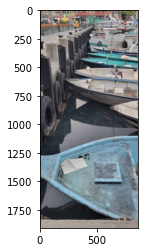

In [59]:
plt.imshow(rgb)

In [60]:
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

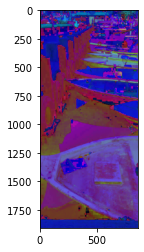

In [61]:
plt.imshow(hsv)

In [62]:
low = (35, 66, 58)
up = (232, 231, 229)

In [63]:
mask = cv2.inRange(hsv, low, up)

In [64]:
result = cv2.bitwise_and(im, im, mask=mask)

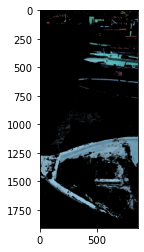

In [65]:
rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [133]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

In [134]:
thresh = threshold_otsu(gray)
print(thresh)
otsu  = gray > thresh
filtered = filter_image(rgb, otsu)

45


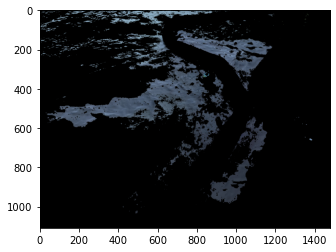

In [135]:
plt.imshow(filtered)